<a href="https://colab.research.google.com/github/ramank123/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction_Web_Crawlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Email Campaign Effectiveness Prediction**


##**Problem Description**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

In [ ]:
#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the csv dataset
df_orig = pd.read_csv("/content/drive/MyDrive/data_email_campaign.csv")

In [ ]:
#first look of our dataset
df_orig.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
#basic info about our data
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


##**Data Cleaning and PreProcessing:**

When we have raw data, it may contain missing values, NaN values or absurd values. It is necessary to check and handle these values before feeding it to the models, so as to obtain good insights on what the data is trying to say and make great characterisation and prediction which will in turn help improve the business's content. 

In [ ]:
#get the num of nulls in each column
df_orig.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

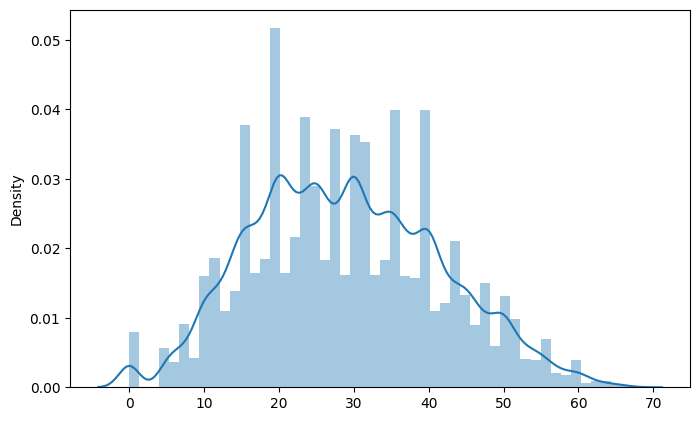

In [ ]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df_orig['Total_Past_Communications'], hist = True)

In [ ]:
#filling up the null values for total past comm
df_orig['Total_Past_Communications'].fillna(df_orig['Total_Past_Communications'].mean(), inplace = True)

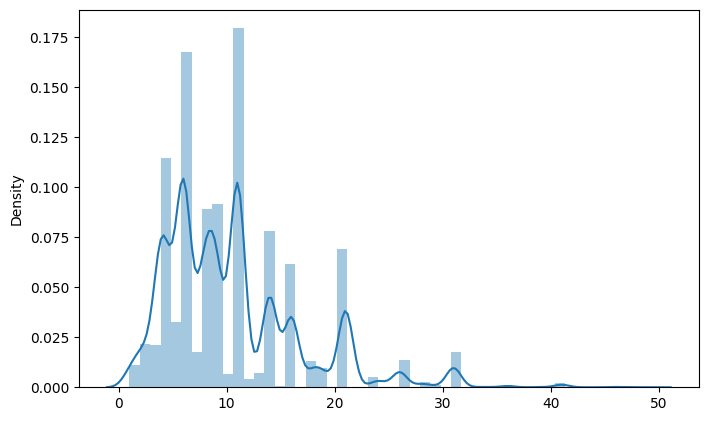

In [ ]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df_orig['Total_Links'], hist= True)

In [ ]:
#filling up the Total Links Column
df_orig['Total_Links'].fillna(df_orig['Total_Links'].mode()[0], inplace = True)

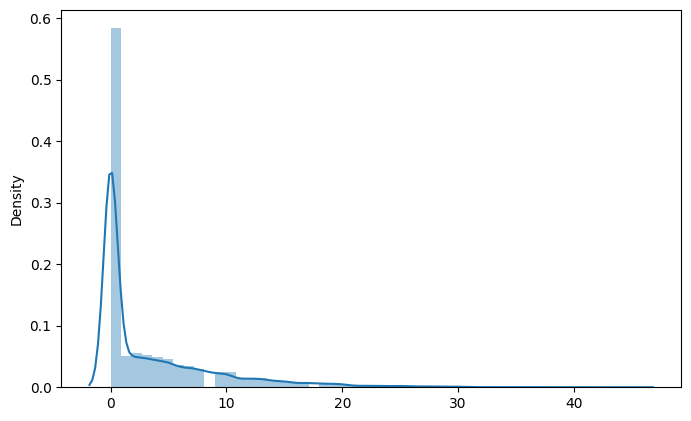

In [ ]:
#total image distribution
sns.distplot(x=df_orig['Total_Images'], hist=True)

In [ ]:
#filling up the Total Images Column
df_orig['Total_Images'].fillna(df_orig['Total_Images'].mode()[0], inplace = True)

In [ ]:
#check for duplicates
df_orig.duplicated().sum()

0

##**Exploratory Data Analysis**:


Exploratory data analysis is an important part of data analysis. It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

We will explore every feature against our target variable and analyze it's influence on it.

####Categorical Variables:
We have six categorical variables Email Type, Email Source, Email Campaign Type, Time Email sent Category, Customer Location and Email Status. We should keep in mind that we have a lot of null values in Customer Location feature and after analysing it's influence on our target variable, we will fill it accordingly or remove it. If a particular location is influencing our target variables and aiding in to getting it ignored or otherwise, it should be filled on a condition (on Email Status) row wise.

####Continuous Variables:
Our continuous variables include Subject Hotness Score, Total Past Communications, Word Count, Total Links and Total Images. 

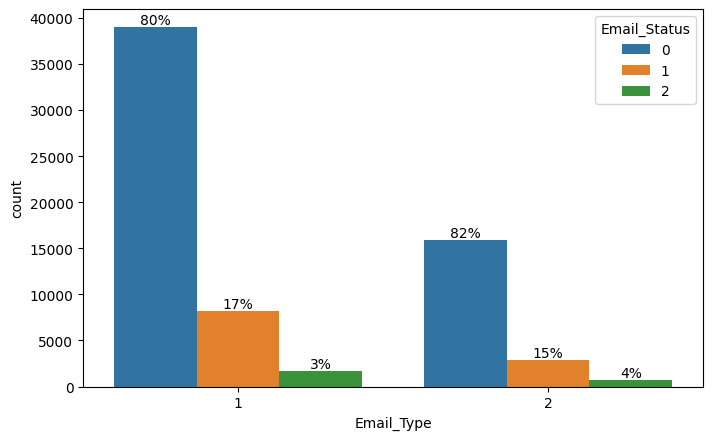

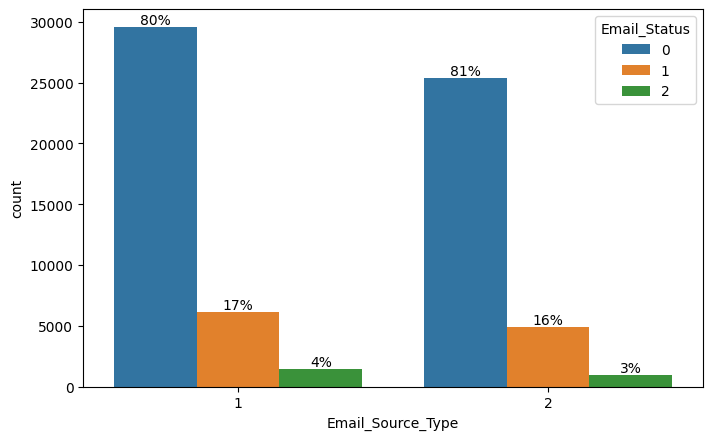

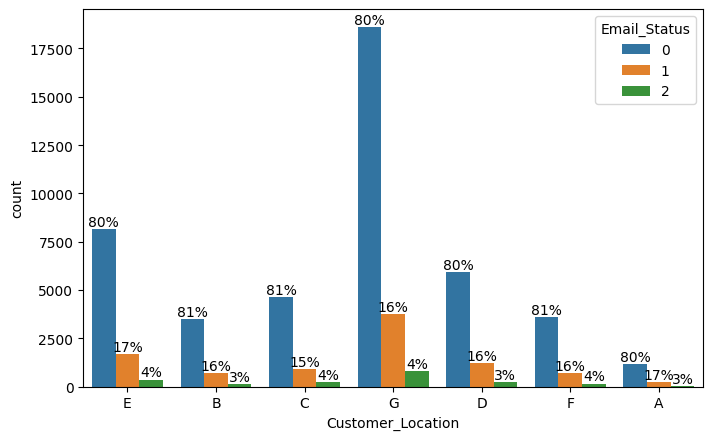

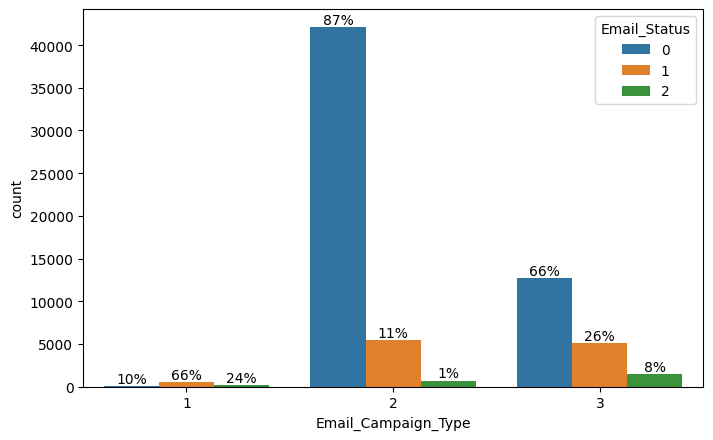

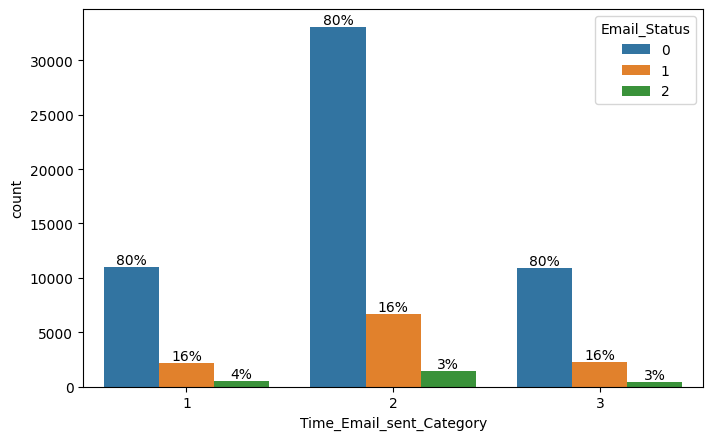

In [ ]:
#starting with categorical variables
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df_orig[value], hue=df_orig[Target_var[0]])
  unique = len([x for x in df_orig[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()
              

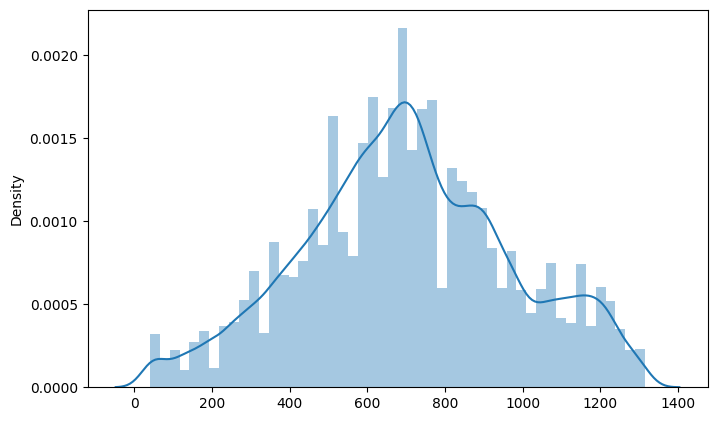

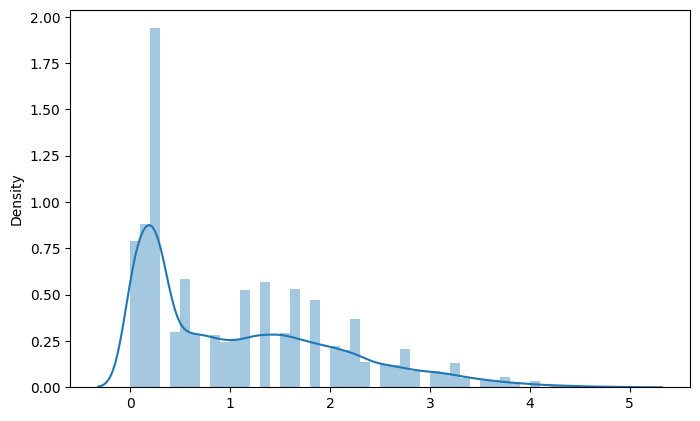

In [ ]:
#continuous variables
#distribution of other continuous features and understanding where the data tends to
cont_var = ['Word_Count','Subject_Hotness_Score']
for i, value in enumerate(cont_var):
 sns.distplot(x=df_orig[value], hist = True)
 plt.show()

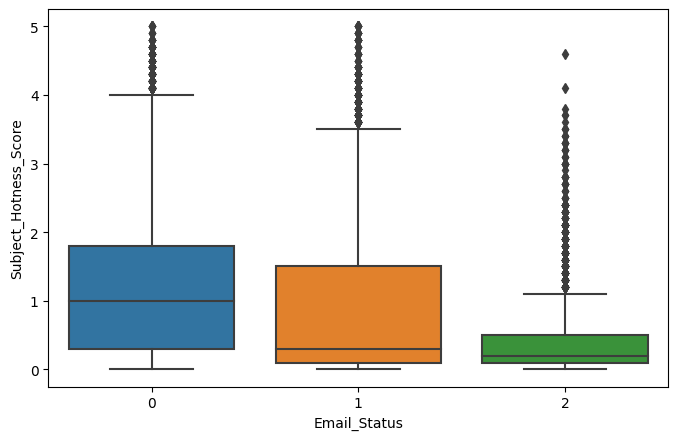

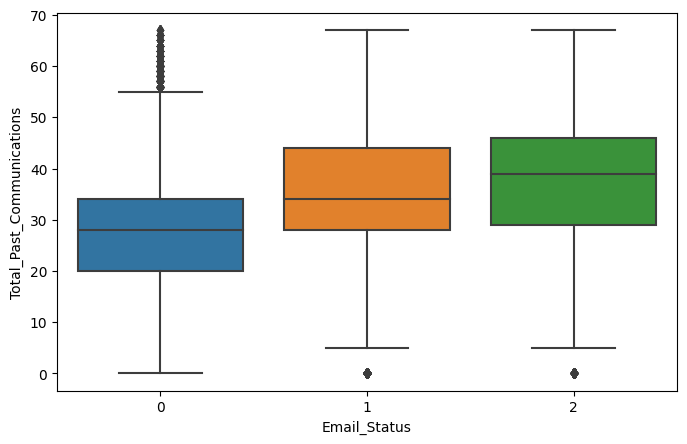

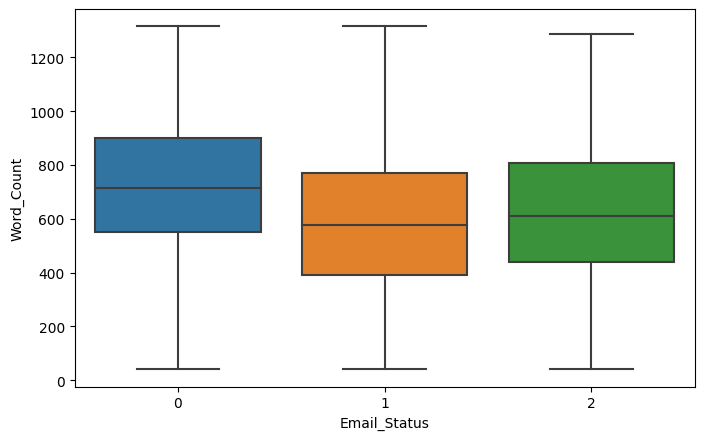

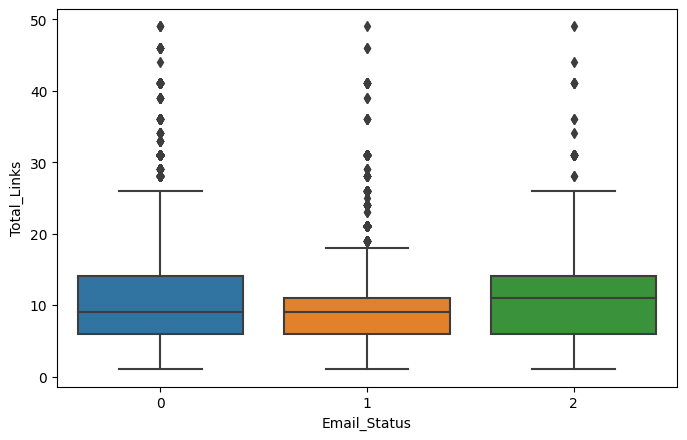

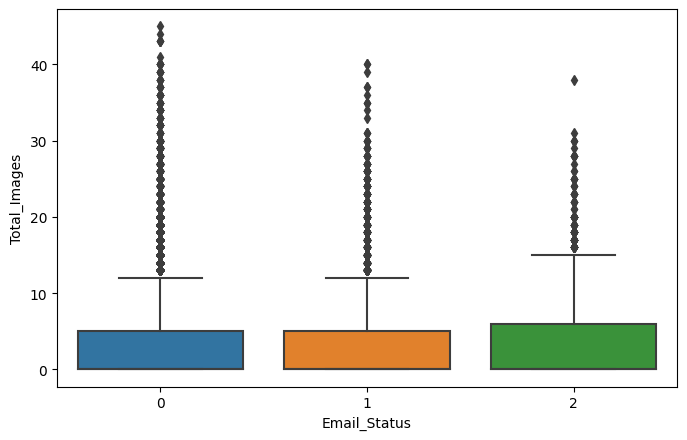

In [ ]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=df_orig['Email_Status'], y= df_orig[value])
 plt.show()


**Correlation:**
To get an understanding of how much correlated, positively or negatively our features is with our target variable, we will be creating a correlation matrix.

We will be removing Customer location and Email Id features. They will not contribute in deciding whether a customer will ignore, read, acknowledge the email.
Let's get to it.



In [ ]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df = df_orig.drop(columns_to_drop,axis=1)

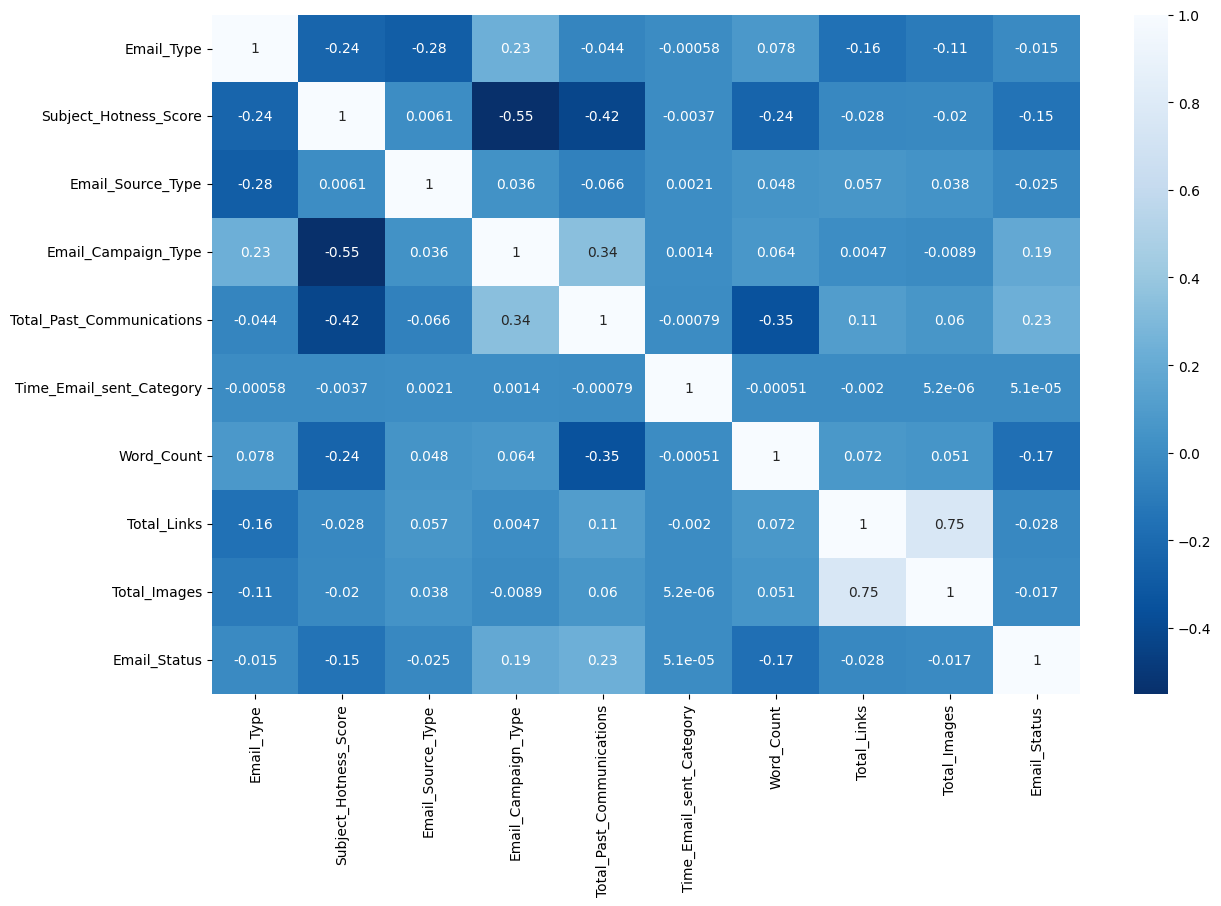

In [ ]:
#correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)

**Observation:**
Correlation matrix justifies our earlier hypotheses. Email Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged.
Word Count and Subject Hotness score are the most negatives amongst other. We can see multicollinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.


##Data Manipulation and Feature Engineering:
Data manipulation involves manipulating and changing our dataset before feeding it to various clasification machine learning models. This involves keeping important features handling multicollinearity in the dataset, outlier treatment and creating dummy variables if necessary.

We have outliers in our dataset as we saw it earlier in data exploration but as the classes are imbalanced and we cannot also risk overfitting, so we will be exploring how many outliers we have in each class and then decide whether we should keep them or get rid of them.



In [ ]:
#VIF code
def vif_calc(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [ ]:
#let's get VIF scores
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


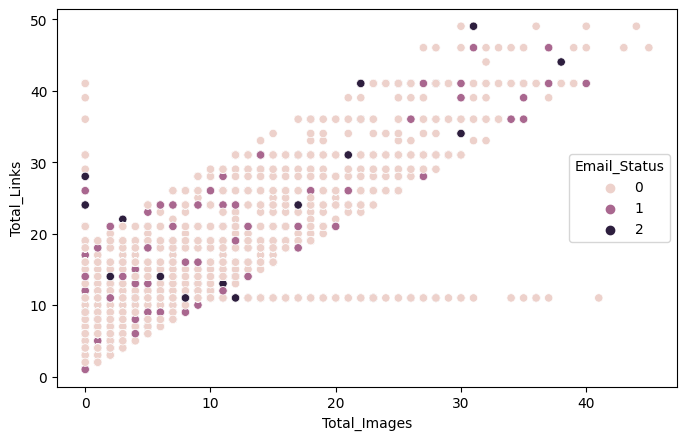

In [ ]:
#scatter plot between images and links, shows a linear relationship
sns.scatterplot(x=df["Total_Images"],y=df["Total_Links"],hue=df['Email_Status']) #it shows the collinearity

In [ ]:
#we can try combining them up
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

In [ ]:
#let's check VIF scores
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Total_Img_links,2.629047




**Outliers:**

With the help of box-plots, we earlier saw that besides Word Count all our other continuous variables have outliers, but deleting them would lead to loss of information as our target variable is highly imbalanced we need to make sure that we aren't deleting more than 5% of information or data related to the minority class.

In [ ]:
#Let's check the number of outliers in each category of diff continuous features
cont_var.remove('Word_Count')
cont_var.remove('Total_Links')
cont_var.remove('Total_Images')
cont_var.append('Total_Img_links')


In [ ]:
#the number of outliers in different features acc to email_status
outliers = {}
for elem in cont_var:
  q_75, q_25 = np.percentile(df.loc[:,elem],[75,25])
  IQR = q_75-q_25
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df.loc[df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Img_links': {0: 3061, 1: 437, 2: 122}}


In [ ]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
#percentage of outliers in minority class
minority_outliers = 0  
majority_outliers = 0
for col in cont_var:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_maj = df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_min+total_maj))*100
print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907
The percentage of total outliers are 5.856363290565154


In [ ]:
df.shape

(68353, 9)

In [ ]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
#deleting majority outliers
for elem in cont_var:
  q_low = df[elem].quantile(0.01)
  q_hi  = df[elem].quantile(0.99)
  df = df.drop(df[(df[elem] > q_hi) &  (df['Email_Status']==0)].index)
  df = df.drop(df[(df[elem] < q_low) & (df['Email_Status']==0)].index)

In [ ]:
df.shape

(66914, 9)

In [ ]:
df['Email_Status'].value_counts()

0    53502
1    11039
2     2373
Name: Email_Status, dtype: int64

**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

In [ ]:
#let's add back word count
cont_var.append('Word_Count')

In [ ]:
#feature scaling of numerical variables
for elem in cont_var:
  df[elem] = (df[elem] - df[elem].mean()) / (df[elem].std())

df.head(1)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Img_links
0,1,1.163386,2,2,0.348093,1,-0.980426,0,-0.545194


**One hot encoding**

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough. We have categorical data integer encoded with us, but assuming a natural order and allowing this data to the model may result in poor performance. If the
categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

In [ ]:
#getting dummy variables for categorical data
categorical_variables.remove('Customer_Location')

In [ ]:
#categorical var that need to be encoded
categorical_variables

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [ ]:
#creating dummy variables
df = pd.get_dummies(df,columns=categorical_variables)
# as some features had binary categories, we are going to delete one of them to keep it binary encoded and have less columns
df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,1.163386,0.348093,-0.980426,0,-0.545194,1,0,0,1,0,1,0,0


In [ ]:
#shape
df.shape

(66914, 13)

In [ ]:
#Email_Status should be the last col
columns=list(df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
df=df[columns]
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,1.163386,0.348093,-0.980426,-0.545194,1,0,0,1,0,1,0,0,0


##**Modelling**:


**Train-Test Split**


In [ ]:
df.shape

(66914, 13)

In [ ]:
#X and Y 
X = df.drop('Email_Status',axis=1)
y = df['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (66914, 12)
Shape of Y: (66914,)


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 
#we need to stratify to get same proprtion of classes in both the sets

####**Handling Class Imbalance**

In the exploratory data analysis, we clearly saw that the number of emails being ignored was a lot more than being read and acknowledged. 
This imbalance in the class, can lead to biased classification towards ignored emails. We can handle it with Oversampling and Undersampling.

First, we will go with Random Undersampling and check the results for various models that we will be testing and then with SMOTE. This technique generates synthetic data for the minority class. Lastly, we will analyze which method works for the best for our dataset.

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



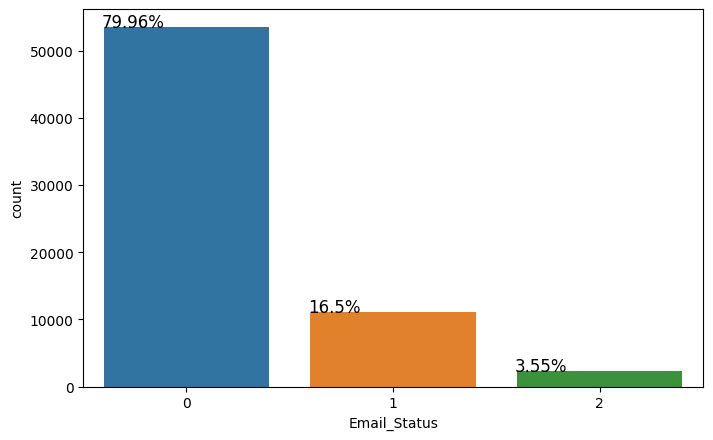

In [ ]:
#count plot for target variable
#visualizing our imbalanced dataset
ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

In [ ]:
df['Email_Status'].value_counts()

0    53502
1    11039
2     2373
Name: Email_Status, dtype: int64

**Random Undersampling:**



In [ ]:
#importing random under sampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#resample
rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

#print shape
print('Original dataset shape:', len(y_train))
print('Resampled dataset shape', len(y_train_rus))

Original dataset shape: 53531
Resampled dataset shape 5694


Class=0, n=1898 (33.333%)
Class=1, n=1898 (33.333%)
Class=2, n=1898 (33.333%)


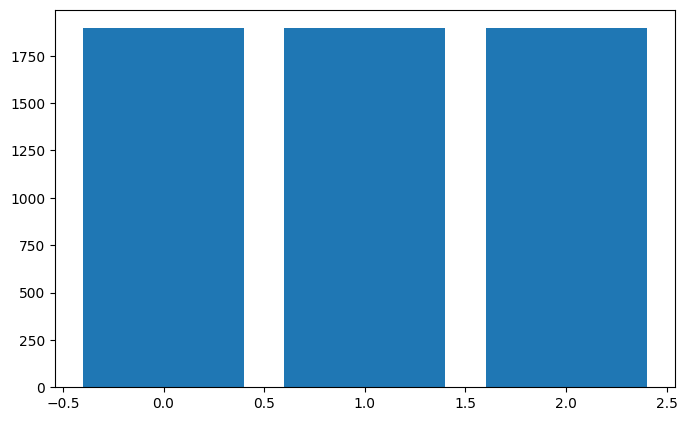

In [ ]:
#visualization of resampled data
def resampled_data_visual(y_train_rus):
  counter = Counter(y_train_rus)
  for key,value in counter.items():
    per = value / len(y_train_rus) * 100
    print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
  # plot the distribution
  plt.bar(counter.keys(), counter.values())
  plt.show()

resampled_data_visual(y_train_rus)

**SMOTE:** 

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 53531
Resampled dataset shape 128406


Class=0, n=42802 (33.333%)
Class=1, n=42802 (33.333%)
Class=2, n=42802 (33.333%)


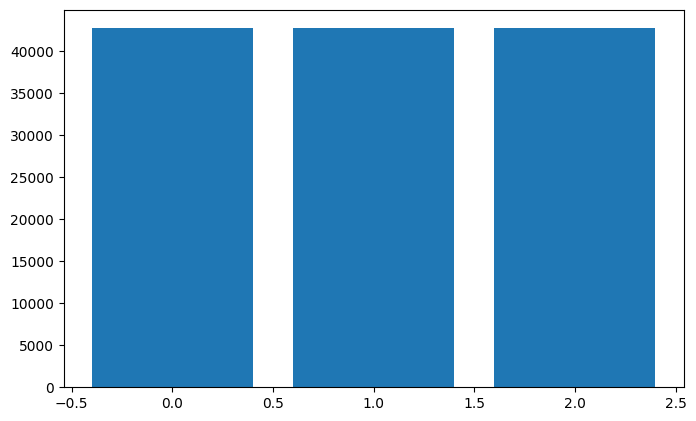

In [ ]:
#visualization of resampled data
resampled_data_visual(y_train_smote)

####**Logistic Regression:**

Logistic Regression is a classification algorithm that predicts the probability of an outcome that can have only two values. 

Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.




In [ ]:
#importing libraries
from sklearn.linear_model import LogisticRegression
#fitting Undersampling
logistic_rus = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_rus.fit(x_train_rus, y_train_rus)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#fitting on smote
logistic_smote = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

In [ ]:
#Function to evaluate the model

def model_evaluation(model_name_RUS,model_name_SMOTE,model_var_rus, model_var_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification for Random Undersampling and SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
  
  #Making predictions random undersampling
  y_pred_rus_train = model_var_rus.predict(x_train_rus)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(x_train_rus)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train_rus,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train_rus,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')

  #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')

  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  print(classification_report(y_test,y_pred_rus_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  print(classification_report(y_test,y_pred_smote_test))

 
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_rus_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_rus_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  dict_list = [final_dict_rus, final_dict_smote]
  return dict_list

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

----- Evaluation on Random Undersampled data -----LogisticReg RUS------
--------------Test data ---------------

Confusion matrix 

[[7594 1426 1680]
 [ 697  468 1043]
 [ 102   53  320]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80     10700
           1       0.24      0.21      0.23      2208
           2       0.11      0.67      0.18       475

    accuracy                           0.63     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.63      0.68     13383



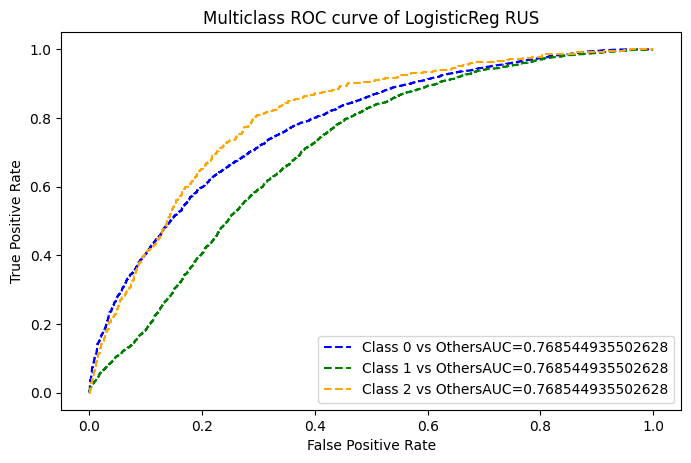

----- Evaluation on SMOTE data -------LogisticReg SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[7660 1395 1645]
 [ 712  461 1035]
 [ 102   49  324]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80     10700
           1       0.24      0.21      0.22      2208
           2       0.11      0.68      0.19       475

    accuracy                           0.63     13383
   macro avg       0.42      0.54      0.40     13383
weighted avg       0.77      0.63      0.68     13383



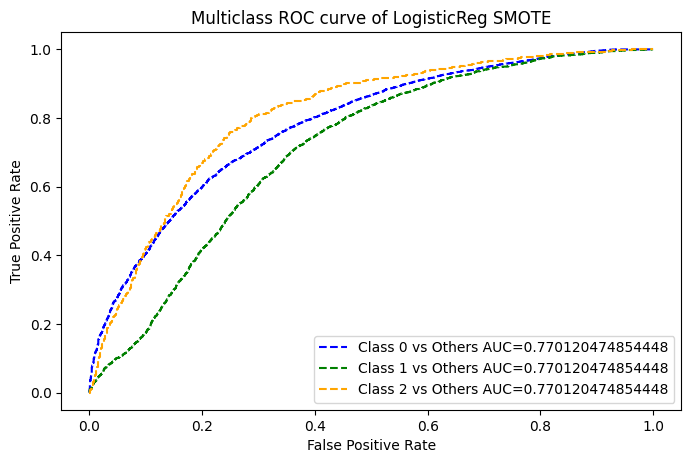

[{'Model_Name': 'LogisticReg RUS',
  'Train_Accuracy': 0.533544081489287,
  'Train_Recall': 0.533544081489287,
  'Train_Precision': 0.5172274377821932,
  'Train_F1score': 0.506674393621358,
  'Train_AUC': 0.7245392243623979,
  'Test_Accuracy': 0.626316969289397,
  'Test_Recall': 0.626316969289397,
  'Test_Precision': 0.7667985177103219,
  'Test_F1score': 0.6796227100583893,
  'Test_AUC': 0.768544935502628},
 {'Model_Name': 'LogisticReg SMOTE',
  'Train_Accuracy': 0.5370621310530661,
  'Train_Recall': 0.5370621310530661,
  'Train_Precision': 0.5206787268809668,
  'Train_F1score': 0.5108579243457873,
  'Train_AUC': 0.7254070379582679,
  'Test_Accuracy': 0.6310244339834118,
  'Test_Recall': 0.6310244339834118,
  'Test_Precision': 0.7664746176746253,
  'Test_F1score': 0.6824120550096173,
  'Test_AUC': 0.770120474854448}]

In [ ]:
#Let's evaluate logistic reg
logistic_reg_list = model_evaluation('LogisticReg RUS','LogisticReg SMOTE',logistic_rus, logistic_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
logistic_reg_list

In [ ]:
#adding result to final list
add_list_to_final_df(logistic_reg_list)

In [ ]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.533544,0.533544,0.517227,0.506674,0.724539,0.626317,0.626317,0.766799,0.679623,0.768545
1,LogisticReg SMOTE,0.537062,0.537062,0.520679,0.510858,0.725407,0.631024,0.631024,0.766475,0.682412,0.770120


####**Decison Tree Model:**
Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

In [ ]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Classifier RUS
dt_rus = DecisionTreeClassifier()
dt_rus.fit(x_train_rus,y_train_rus)

DecisionTreeClassifier()

In [ ]:
#Classifier SMOTE
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------Test data ---------------

Confusion matrix 

[[5510 2953 2237]
 [ 610  792  806]
 [  91  170  214]]
              precision    recall  f1-score   support

           0       0.89      0.51      0.65     10700
           1       0.20      0.36      0.26      2208
           2       0.07      0.45      0.11       475

    accuracy                           0.49     13383
   macro avg       0.39      0.44      0.34     13383
weighted avg       0.74      0.49      0.57     13383



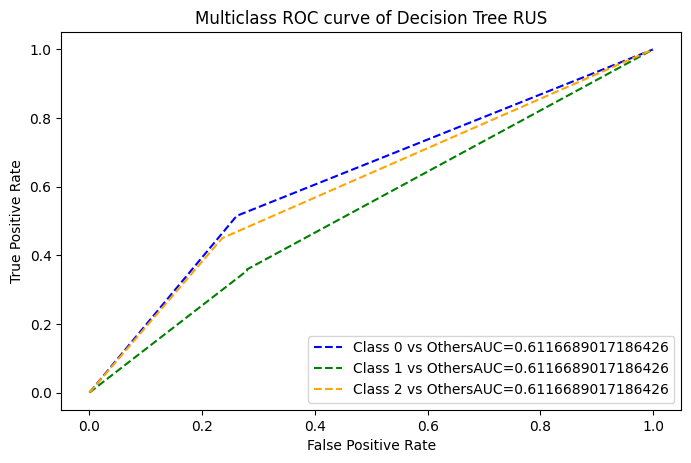

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8607 1679  414]
 [1332  642  234]
 [ 233  181   61]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     10700
           1       0.26      0.29      0.27      2208
           2       0.09      0.13      0.10       475

    accuracy                           0.70     13383
   macro avg       0.40      0.41      0.40     13383
weighted avg       0.72      0.70      0.71     13383



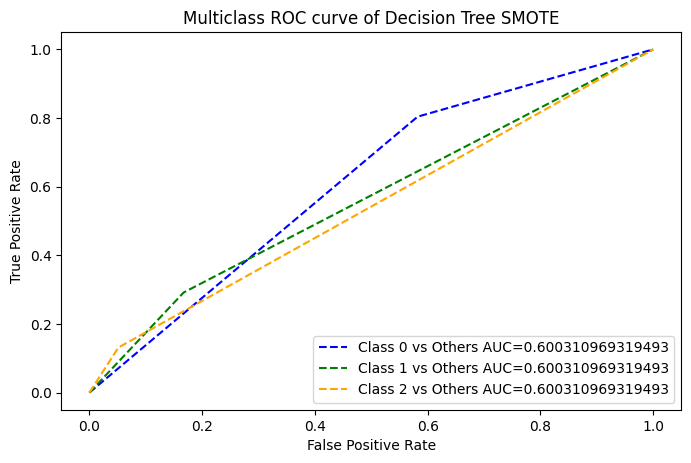

[{'Model_Name': 'Decision Tree RUS',
  'Train_Accuracy': 0.9992975061468212,
  'Train_Recall': 0.9992975061468212,
  'Train_Precision': 0.9992989835261129,
  'Train_F1score': 0.9992975053667925,
  'Train_AUC': 0.9999992597535794,
  'Test_Accuracy': 0.48688634835238737,
  'Test_Recall': 0.4868863483523873,
  'Test_Precision': 0.7449927402275239,
  'Test_F1score': 0.5677574934563855,
  'Test_AUC': 0.6116689017186426},
 {'Model_Name': 'Decision Tree SMOTE',
  'Train_Accuracy': 0.9994081273460742,
  'Train_Recall': 0.9994081273460742,
  'Train_Precision': 0.9994086700781992,
  'Train_F1score': 0.9994081614919633,
  'Train_AUC': 0.9999996201806344,
  'Test_Accuracy': 0.6956586714488531,
  'Test_Recall': 0.6956586714488531,
  'Test_Precision': 0.7219004563914652,
  'Test_F1score': 0.7080327332716886,
  'Test_AUC': 0.600310969319493}]

In [ ]:
dt_eval_list = model_evaluation('Decision Tree RUS', 'Decision Tree SMOTE', dt_rus, dt_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
dt_eval_list

In [ ]:
#adding list
add_list_to_final_df(dt_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.533544,0.533544,0.517227,0.506674,0.724539,0.626317,0.626317,0.766799,0.679623,0.768545
1,LogisticReg SMOTE,0.537062,0.537062,0.520679,0.510858,0.725407,0.631024,0.631024,0.766475,0.682412,0.770120
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.486886,0.486886,0.744993,0.567757,0.611669
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.695659,0.695659,0.721900,0.708033,0.600311


####**Random Forest Model:**

To prevent overfitting, we will be building random forest model. Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. The ensemble models with only one tree will overfit to data as well because it is the same as a single decision tree. When we add trees to the Random Forest then the tendency to overfitting decreases.



In [ ]:
#importing library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#RUS
rf_rus = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_rus.fit(x_train_rus,y_train_rus)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [ ]:
#SMOTE
rf_smote = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=100, oob_score=True)
rf_smote.fit(x_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

----- Evaluation on Random Undersampled data -----Random Forest RUS------
--------------Test data ---------------

Confusion matrix 

[[7966 1060 1674]
 [ 731  438 1039]
 [  88   49  338]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     10700
           1       0.28      0.20      0.23      2208
           2       0.11      0.71      0.19       475

    accuracy                           0.65     13383
   macro avg       0.43      0.55      0.41     13383
weighted avg       0.78      0.65      0.70     13383



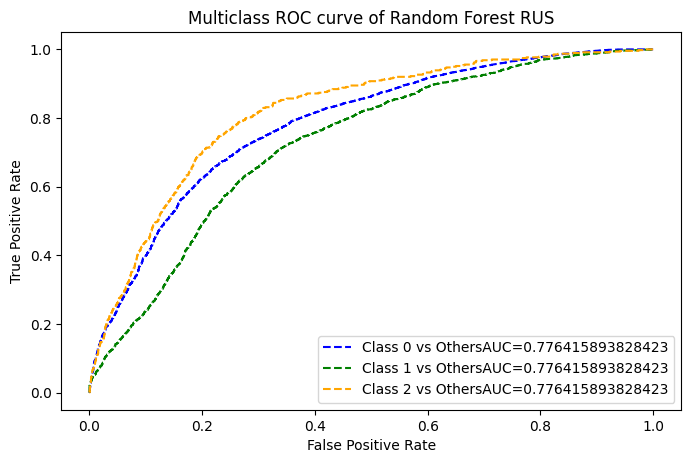

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8279 1101 1320]
 [ 830  478  900]
 [ 106   54  315]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     10700
           1       0.29      0.22      0.25      2208
           2       0.12      0.66      0.21       475

    accuracy                           0.68     13383
   macro avg       0.44      0.55      0.43     13383
weighted avg       0.77      0.68      0.71     13383



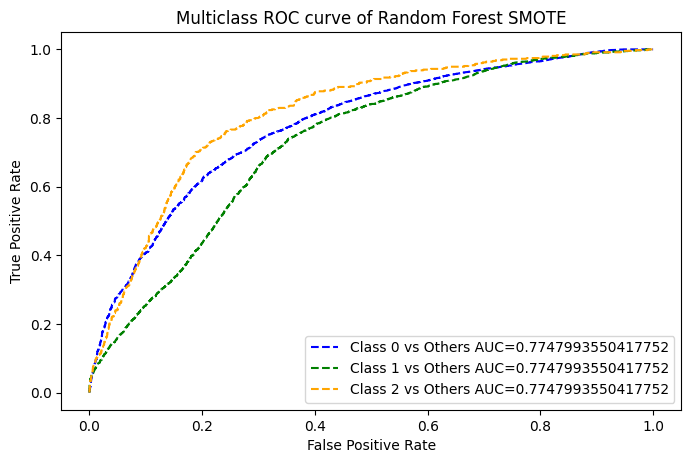

[{'Model_Name': 'Random Forest RUS',
  'Train_Accuracy': 0.5561995082543028,
  'Train_Recall': 0.5561995082543028,
  'Train_Precision': 0.5471864473578786,
  'Train_F1score': 0.5290658082202871,
  'Train_AUC': 0.7546838860938416,
  'Test_Accuracy': 0.6532167675409101,
  'Test_Recall': 0.6532167675409101,
  'Test_Precision': 0.775628800648713,
  'Test_F1score': 0.6990265745226483,
  'Test_AUC': 0.776415893828423},
 {'Model_Name': 'Random Forest SMOTE',
  'Train_Accuracy': 0.558322819805928,
  'Train_Recall': 0.558322819805928,
  'Train_Precision': 0.5406779728800784,
  'Train_F1score': 0.530333479294692,
  'Train_AUC': 0.7561923588723496,
  'Test_Accuracy': 0.6778749159381304,
  'Test_Recall': 0.6778749159381304,
  'Test_Precision': 0.7710152318961966,
  'Test_F1score': 0.7132417943293649,
  'Test_AUC': 0.7747993550417752}]

In [ ]:
#Random Forest Evaluation
rf_eval_list = model_evaluation('Random Forest RUS', 'Random Forest SMOTE', rf_rus, rf_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
rf_eval_list

In [ ]:
#adding list
add_list_to_final_df(rf_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.533544,0.533544,0.517227,0.506674,0.724539,0.626317,0.626317,0.766799,0.679623,0.768545
1,LogisticReg SMOTE,0.537062,0.537062,0.520679,0.510858,0.725407,0.631024,0.631024,0.766475,0.682412,0.770120
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.486886,0.486886,0.744993,0.567757,0.611669
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.695659,0.695659,0.721900,0.708033,0.600311
4,Random Forest RUS,0.556200,0.556200,0.547186,0.529066,0.754684,0.653217,0.653217,0.775629,0.699027,0.776416
5,Random Forest SMOTE,0.558323,0.558323,0.540678,0.530333,0.756192,0.677875,0.677875,0.771015,0.713242,0.774799


**Random Forest Hyperparameter Tuning:**

In [ ]:
#classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
#Parameter dictionary
params = {'max_depth': [3,5,10,20],'min_samples_leaf': [5,10,20,50,100],'n_estimators': [10,25,30,50,100,200]}

In [ ]:
#Grid Search to get the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")

In [ ]:
#Fitting RUS to grid search
grid_search.fit(x_train_rus,y_train_rus)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [ ]:
#optimal model
rf_tuned_rus = grid_search.best_estimator_

In [ ]:
#Fitting SMOTE
grid_search_smote = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote.fit(x_train_smote,y_train_smote)
#optimal smote model
rf_tuned_smote = grid_search_smote.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


----- Evaluation on Random Undersampled data -----RandomF Tuned RUS------
--------------Test data ---------------

Confusion matrix 

[[7390 1780 1530]
 [ 620  676  912]
 [  78  102  295]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.79     10700
           1       0.26      0.31      0.28      2208
           2       0.11      0.62      0.18       475

    accuracy                           0.62     13383
   macro avg       0.43      0.54      0.42     13383
weighted avg       0.78      0.62      0.68     13383



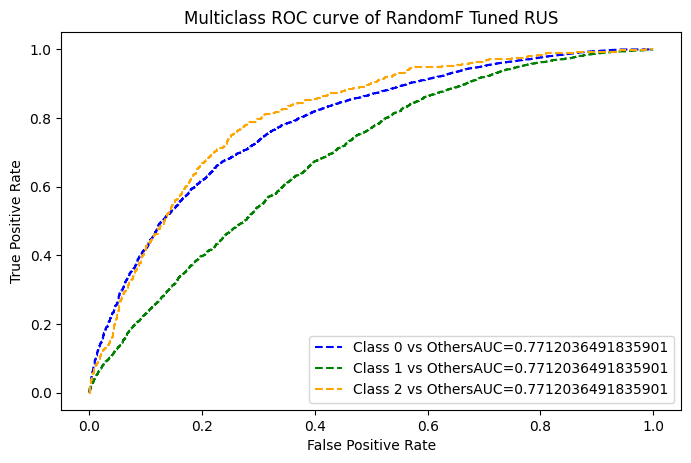

----- Evaluation on SMOTE data -------RandomF Tuned SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[9028 1294  378]
 [1088  808  312]
 [ 181  202   92]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     10700
           1       0.35      0.37      0.36      2208
           2       0.12      0.19      0.15       475

    accuracy                           0.74     13383
   macro avg       0.45      0.47      0.45     13383
weighted avg       0.76      0.74      0.75     13383



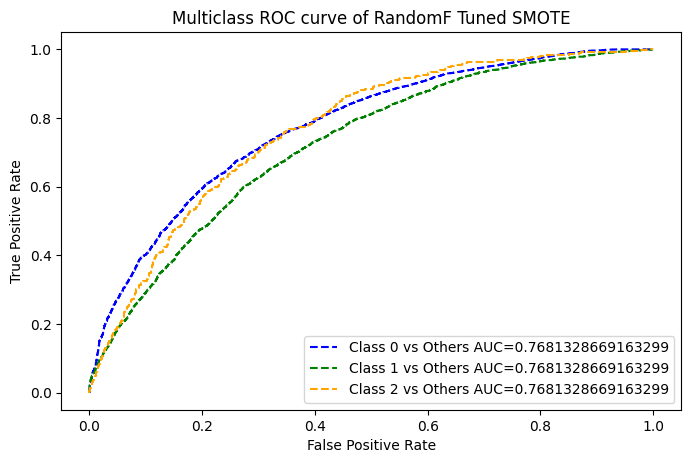

[{'Model_Name': 'RandomF Tuned RUS',
  'Train_Accuracy': 0.7613277133825079,
  'Train_Recall': 0.7613277133825079,
  'Train_Precision': 0.7649475595169896,
  'Train_F1score': 0.760403172308655,
  'Train_AUC': 0.9190015889389418,
  'Test_Accuracy': 0.624747814391392,
  'Test_Recall': 0.624747814391392,
  'Test_Precision': 0.7779485183465995,
  'Test_F1score': 0.682283621652083,
  'Test_AUC': 0.7712036491835901},
 {'Model_Name': 'RandomF Tuned SMOTE',
  'Train_Accuracy': 0.9027226142080588,
  'Train_Recall': 0.9027226142080588,
  'Train_Precision': 0.9026648901874434,
  'Train_F1score': 0.9020768505055726,
  'Train_AUC': 0.9821726312251673,
  'Test_Accuracy': 0.7418366584472839,
  'Test_Recall': 0.7418366584472839,
  'Test_Precision': 0.7630239898011111,
  'Test_F1score': 0.7518206315425519,
  'Test_AUC': 0.7681328669163299}]

In [ ]:
#Model Evaluation for Random Forest Hyperparameter 
rf_tuned_list = model_evaluation('RandomF Tuned RUS', 'RandomF Tuned SMOTE', rf_tuned_rus, rf_tuned_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
rf_tuned_list

In [ ]:
#adding list
add_list_to_final_df(rf_tuned_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.533544,0.533544,0.517227,0.506674,0.724539,0.626317,0.626317,0.766799,0.679623,0.768545
1,LogisticReg SMOTE,0.537062,0.537062,0.520679,0.510858,0.725407,0.631024,0.631024,0.766475,0.682412,0.770120
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.486886,0.486886,0.744993,0.567757,0.611669
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.695659,0.695659,0.721900,0.708033,0.600311
4,Random Forest RUS,0.556200,0.556200,0.547186,0.529066,0.754684,0.653217,0.653217,0.775629,0.699027,0.776416
5,Random Forest SMOTE,0.558323,0.558323,0.540678,0.530333,0.756192,0.677875,0.677875,0.771015,0.713242,0.774799
6,RandomF Tuned RUS,0.761328,0.761328,0.764948,0.760403,0.919002,0.624748,0.624748,0.777949,0.682284,0.771204
7,RandomF Tuned SMOTE,0.902723,0.902723,0.902665,0.902077,0.982173,0.741837,0.741837,0.763024,0.751821,0.768133


**Random Forest HyperParameter Tuned Feature Importance:**

In [ ]:
#feature importance by random forest 
feature_imp = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": rf_tuned_smote.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)

In [ ]:
feature_imp

,Variable,Importance
1,Total_Past_Communications,0.251056
2,Word_Count,0.207232
0,Subject_Hotness_Score,0.202805
3,Total_Img_links,0.181687
7,Email_Campaign_Type_2,0.052960
8,Email_Campaign_Type_3,0.027936
4,Email_Type_1,0.019935
5,Email_Source_Type_1,0.016222
6,Email_Campaign_Type_1,0.010582
10,Time_Email_sent_Category_2,0.010236


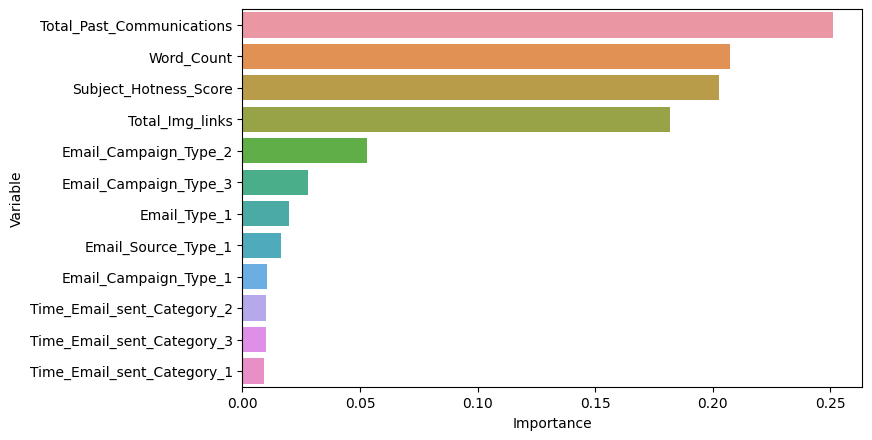

In [ ]:
#visualisation
sns.barplot(x=feature_imp['Importance'],y= feature_imp['Variable'])

In [ ]:
#drop unrelated features
x_train_smote1 = x_train_smote.drop(['Time_Email_sent_Category_3','Time_Email_sent_Category_1','Time_Email_sent_Category_2'],axis=1)
x_train_rus1 = x_train_rus.drop(['Time_Email_sent_Category_3','Time_Email_sent_Category_1','Time_Email_sent_Category_2'],axis=1)
X_test1 = X_test.drop(['Time_Email_sent_Category_3','Time_Email_sent_Category_1','Time_Email_sent_Category_2'],axis=1)

####Feature Selection

In [ ]:
#RUS
#Grid Search to get the best parameters
grid_search_rus = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
#Fitting RUS to grid search
grid_search_rus.fit(x_train_rus1,y_train_rus)
#optimal model
rf_tuned_rus1 = grid_search_rus.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


In [ ]:
#Fitting SMOTE
grid_search_smote1 = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote1.fit(x_train_smote1,y_train_smote)
#optimal smote model
rf_tuned_smote1 = grid_search_smote1.best_estimator_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


----- Evaluation on Random Undersampled data -----RandomF Tuned RUS FSel------
--------------Test data ---------------

Confusion matrix 

[[7277 1905 1518]
 [ 581  696  931]
 [  76  118  281]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     10700
           1       0.26      0.32      0.28      2208
           2       0.10      0.59      0.18       475

    accuracy                           0.62     13383
   macro avg       0.43      0.53      0.41     13383
weighted avg       0.78      0.62      0.68     13383



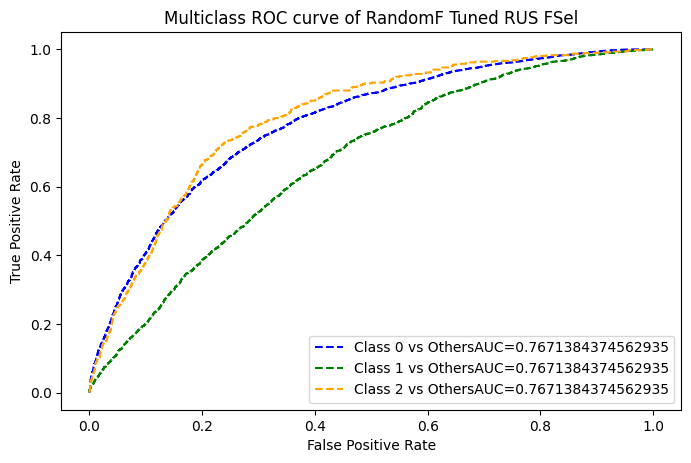

----- Evaluation on SMOTE data -------RandomF Tuned SMOTE FSel-----
---------------Test data ---------------

Confusion matrix 

[[9248 1114  338]
 [1130  770  308]
 [ 200  178   97]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     10700
           1       0.37      0.35      0.36      2208
           2       0.13      0.20      0.16       475

    accuracy                           0.76     13383
   macro avg       0.46      0.47      0.46     13383
weighted avg       0.77      0.76      0.76     13383



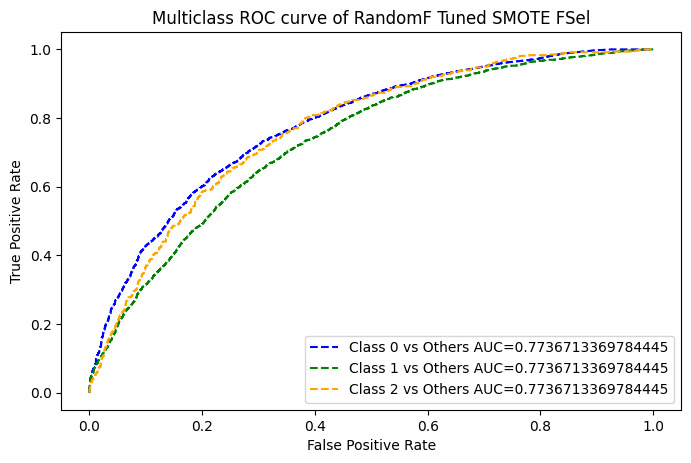

[{'Model_Name': 'RandomF Tuned RUS FSel',
  'Train_Accuracy': 0.7551808921671935,
  'Train_Recall': 0.7551808921671935,
  'Train_Precision': 0.7567845500990148,
  'Train_F1score': 0.754525169834613,
  'Train_AUC': 0.9152701917941464,
  'Test_Accuracy': 0.6167525965777478,
  'Test_Recall': 0.6167525965777478,
  'Test_Precision': 0.7792005214352422,
  'Test_F1score': 0.6772989926466423,
  'Test_AUC': 0.7671384374562935},
 {'Model_Name': 'RandomF Tuned SMOTE FSel',
  'Train_Accuracy': 0.8934629222933508,
  'Train_Recall': 0.8934629222933508,
  'Train_Precision': 0.8937839672910003,
  'Train_F1score': 0.8925061491314711,
  'Train_AUC': 0.9787648997005443,
  'Test_Accuracy': 0.7558096092057087,
  'Test_Recall': 0.7558096092057087,
  'Test_Precision': 0.7652389309599442,
  'Test_F1score': 0.7601441542018412,
  'Test_AUC': 0.7736713369784445}]

In [ ]:
#Model Evaluation for Random Forest Hyperparameter with feature selection  
rf_tuned_list1 = model_evaluation('RandomF Tuned RUS FSel', 'RandomF Tuned SMOTE FSel', rf_tuned_rus1, rf_tuned_smote1,x_train_rus1, y_train_rus, x_train_smote1, y_train_smote, X_test1, y_test)
rf_tuned_list1

In [ ]:
#adding list
add_list_to_final_df(rf_tuned_list1)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.533544,0.533544,0.517227,0.506674,0.724539,0.626317,0.626317,0.766799,0.679623,0.768545
1,LogisticReg SMOTE,0.537062,0.537062,0.520679,0.510858,0.725407,0.631024,0.631024,0.766475,0.682412,0.770120
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.486886,0.486886,0.744993,0.567757,0.611669
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.695659,0.695659,0.721900,0.708033,0.600311
4,Random Forest RUS,0.556200,0.556200,0.547186,0.529066,0.754684,0.653217,0.653217,0.775629,0.699027,0.776416
5,Random Forest SMOTE,0.558323,0.558323,0.540678,0.530333,0.756192,0.677875,0.677875,0.771015,0.713242,0.774799
6,RandomF Tuned RUS,0.761328,0.761328,0.764948,0.760403,0.919002,0.624748,0.624748,0.777949,0.682284,0.771204
7,RandomF Tuned SMOTE,0.902723,0.902723,0.902665,0.902077,0.982173,0.741837,0.741837,0.763024,0.751821,0.768133
8,RandomF Tuned RUS FSel,0.755181,0.755181,0.756785,0.754525,0.915270,0.616753,0.616753,0.779201,0.677299,0.767138
9,RandomF Tuned SMOTE FSel,0.893463,0.893463,0.893784,0.892506,0.978765,0.755810,0.755810,0.765239,0.760144,0.773671


####**XG Boost Model:**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The two reasons to use XGBoost are also the two goals of the project:
* Execution Speed.
* Model Performance.

In [ ]:
#importing
from xgboost import XGBClassifier

In [ ]:
#fitting rus
xgb_rus = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_rus.fit(x_train_rus,y_train_rus)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [ ]:
#fitting smote
xgb_smote = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_smote.fit(x_train_smote,y_train_smote)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on Random Undersampled data -----XGB RUS------
--------------Test data ---------------

Confusion matrix 

[[6779 2250 1671]
 [ 587  767  854]
 [  85  139  251]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75     10700
           1       0.24      0.35      0.29      2208
           2       0.09      0.53      0.15       475

    accuracy                           0.58     13383
   macro avg       0.41      0.50      0.40     13383
weighted avg       0.77      0.58      0.65     13383



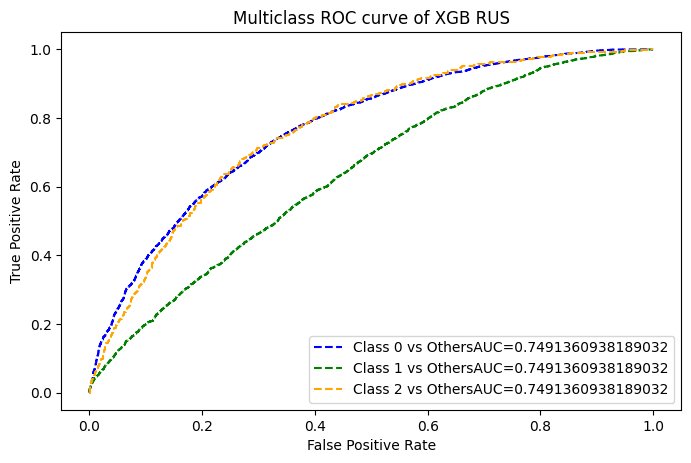

----- Evaluation on SMOTE data -------XGB SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[9986  610  104]
 [1442  611  155]
 [ 278  156   41]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     10700
           1       0.44      0.28      0.34      2208
           2       0.14      0.09      0.11       475

    accuracy                           0.79     13383
   macro avg       0.48      0.43      0.45     13383
weighted avg       0.76      0.79      0.77     13383



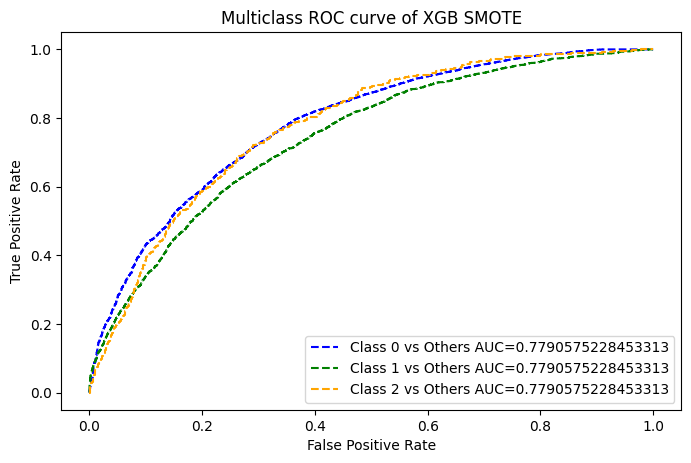

[{'Model_Name': 'XGB RUS',
  'Train_Accuracy': 0.9854232525465402,
  'Train_Recall': 0.9854232525465402,
  'Train_Precision': 0.9855186342291974,
  'Train_F1score': 0.9854209593565049,
  'Train_AUC': 0.9995547880433917,
  'Test_Accuracy': 0.5826047971306881,
  'Test_Recall': 0.5826047971306882,
  'Test_Precision': 0.7707189735611361,
  'Test_F1score': 0.6498708826017073,
  'Test_AUC': 0.7491360938189032},
 {'Model_Name': 'XGB SMOTE',
  'Train_Accuracy': 0.9189134464121614,
  'Train_Recall': 0.9189134464121614,
  'Train_Precision': 0.9209360963887018,
  'Train_F1score': 0.9177332375858853,
  'Train_AUC': 0.985455990693821,
  'Test_Accuracy': 0.7948890383322125,
  'Test_Recall': 0.7948890383322125,
  'Test_Precision': 0.7601032137781079,
  'Test_F1score': 0.7726615150813938,
  'Test_AUC': 0.7790575228453313}]

In [ ]:
#model evaluation of XGB
xgb_eval_list = model_evaluation('XGB RUS', 'XGB SMOTE',xgb_rus, xgb_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
xgb_eval_list

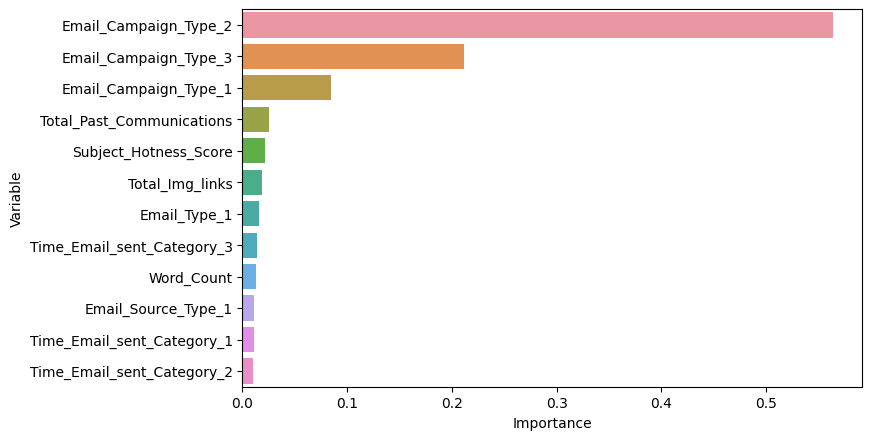

In [ ]:
#visualising feature importance of XGB
feature_imp_xgb = pd.DataFrame({"Variable": x_train_smote.columns,"Importance": xgb_smote.feature_importances_})
feature_imp_xgb.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp_xgb['Importance'], y= feature_imp_xgb['Variable'])

In [ ]:
#adding list
add_list_to_final_df(xgb_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.533544,0.533544,0.517227,0.506674,0.724539,0.626317,0.626317,0.766799,0.679623,0.768545
1,LogisticReg SMOTE,0.537062,0.537062,0.520679,0.510858,0.725407,0.631024,0.631024,0.766475,0.682412,0.770120
2,Decision Tree RUS,0.999298,0.999298,0.999299,0.999298,0.999999,0.486886,0.486886,0.744993,0.567757,0.611669
3,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.695659,0.695659,0.721900,0.708033,0.600311
4,Random Forest RUS,0.556200,0.556200,0.547186,0.529066,0.754684,0.653217,0.653217,0.775629,0.699027,0.776416
5,Random Forest SMOTE,0.558323,0.558323,0.540678,0.530333,0.756192,0.677875,0.677875,0.771015,0.713242,0.774799
6,RandomF Tuned RUS,0.761328,0.761328,0.764948,0.760403,0.919002,0.624748,0.624748,0.777949,0.682284,0.771204
7,RandomF Tuned SMOTE,0.902723,0.902723,0.902665,0.902077,0.982173,0.741837,0.741837,0.763024,0.751821,0.768133
8,RandomF Tuned RUS FSel,0.755181,0.755181,0.756785,0.754525,0.915270,0.616753,0.616753,0.779201,0.677299,0.767138
9,RandomF Tuned SMOTE FSel,0.893463,0.893463,0.893784,0.892506,0.978765,0.755810,0.755810,0.765239,0.760144,0.773671


##**Conclusion:**


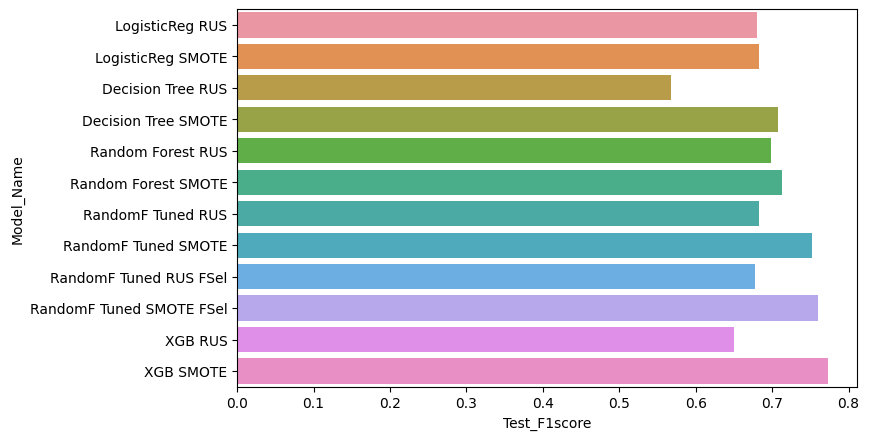

In [ ]:
#visualising our comparison df for f1 score
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_F1score'])

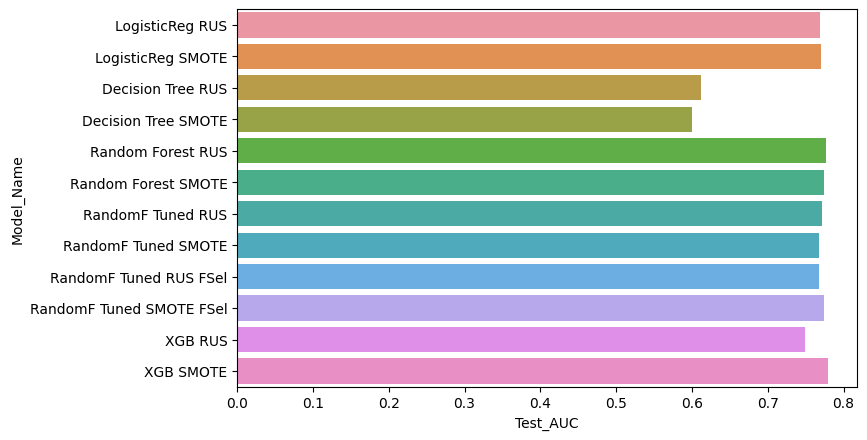

In [ ]:
#visualising for auc
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_AUC'])

In [ ]:
#sorting values
comparison_df.sort_values(by=["Test_F1score",'Test_AUC'], ascending=(False,False), inplace = True, ignore_index = True)
comparison_df.head(5)

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,XGB SMOTE,0.918913,0.918913,0.920936,0.917733,0.985456,0.794889,0.794889,0.760103,0.772662,0.779058
1,RandomF Tuned SMOTE FSel,0.893463,0.893463,0.893784,0.892506,0.978765,0.755810,0.755810,0.765239,0.760144,0.773671
2,RandomF Tuned SMOTE,0.902723,0.902723,0.902665,0.902077,0.982173,0.741837,0.741837,0.763024,0.751821,0.768133
3,Random Forest SMOTE,0.558323,0.558323,0.540678,0.530333,0.756192,0.677875,0.677875,0.771015,0.713242,0.774799
4,Decision Tree SMOTE,0.999408,0.999408,0.999409,0.999408,1.000000,0.695659,0.695659,0.721900,0.708033,0.600311


**Observation:**

Exploratory Data Analysis:

* In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledged are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as a factor in people ignoring, reading or acknowledging our emails. 

* In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

* Time email sent category cannot be considered as a relevant factor in classifying the emails. Both the feature importance showed this particular thing. If we consider Time email sent category 2 as middle of the of course they are going to be read and acknowledged more than morning and night.

* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency it has to get ignored. Too lengthy emails are getting ignored.

* More images were there in ignored emails.
* There are outliers in almost every continuous variable except Word Count and upon analyzing, it was found that outliers make up for more than 5% of the minority data and will influence the results either way, so it was better not to get rid of them.

Modeling:
* Imbalanced Class Handling techniques such as Undersampling and SMOTE were done after train-test split only on the training data, to make sure that the model doesn't catch up to the test set at all and it remains unknown which somewhat reduced our results.
* It is observed that SMOTE worked considerably better than Random Undersampling, it may have led to loss of information.
* Decision Tree Model is overfitting. It is working really great on train data and worse on test data.
* Hyperparameter tuning isn't improving the results to a great degree.
* XGBoost Algorithm worked in the best way possible with such imbalanced data with outliers, followed by Random Forest Hyperparameter Tuned model after feature selection with F1 Score of 0.71 on the test set.


Recommendations:

Upon this in-depth exploratory data analysis and feature importance of various good models, we came to a conclusion and mentioned some factors that are leading to a higher number of ignored emails and accordingly here are some recommendations. 
* Email Campaign Type 1 and 3 are doing better than 2. So, focusing on improving 2, can do the trick.
* The word count should be reasonable. The content should be crisp and to the point with a few marketing gimmicks.
* The number of images and links should be kept in check.
* Total past communications had a positive influence, hence having a healthy relationship with customers is a big yes.
